In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Save off the model/scaler
import pickle

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Resources/train_cleaned.csv")
print(df.shape)
df.head()

(103594, 24)


,id,gender,customer_type,age,type_of_travel,travel_class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


### Initial Pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   gender                             103594 non-null  object 
 2   customer_type                      103594 non-null  object 
 3   age                                103594 non-null  int64  
 4   type_of_travel                     103594 non-null  object 
 5   travel_class                       103594 non-null  object 
 6   flight_distance                    103594 non-null  int64  
 7   inflight_wifi_service              103594 non-null  int64  
 8   departure/arrival_time_convenient  103594 non-null  int64  
 9   ease_of_online_booking             103594 non-null  int64  
 10  gate_location                      103594 non-null  int64  
 11  food_and_drink                     1035

In [4]:
df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel',
       'travel_class', 'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [5]:
# Feature Engineering
# Changing these rankings to String values since they are categorical rather than numeric
# Help from: https://stackoverflow.com/a/70079246
df = df.astype({
    'inflight_wifi_service': 'str',
    'departure/arrival_time_convenient': 'str', 
    'ease_of_online_booking': 'str',
    'gate_location': 'str', 
    'food_and_drink': 'str', 
    'online_boarding': 'str', 
    'seat_comfort': 'str',
    'inflight_entertainment': 'str', 
    'on-board_service': 'str', 
    'leg_room_service': 'str',
    'baggage_handling': 'str', 
    'checkin_service': 'str', 
    'inflight_service': 'str',
    'cleanliness': 'str'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   gender                             103594 non-null  object 
 2   customer_type                      103594 non-null  object 
 3   age                                103594 non-null  int64  
 4   type_of_travel                     103594 non-null  object 
 5   travel_class                       103594 non-null  object 
 6   flight_distance                    103594 non-null  int64  
 7   inflight_wifi_service              103594 non-null  object 
 8   departure/arrival_time_convenient  103594 non-null  object 
 9   ease_of_online_booking             103594 non-null  object 
 10  gate_location                      103594 non-null  object 
 11  food_and_drink                     1035

In [6]:
# Drop the id column
df.drop(columns=['id'], inplace=True)

In [7]:
# Convert "Satisfaction" column into numeric values
df["satisfaction"] = df.satisfaction.apply(lambda x: 1 if x=="satisfied" else 0)

In [8]:
# Check value counts of categorical columns to see if any binning needs to occur
cols = ['gender', 'customer_type', 'type_of_travel', 'travel_class']

for col in cols:
 print(df[col].value_counts())

gender
Female    52576
Male      51018
Name: count, dtype: int64
customer_type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64
type_of_travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64
travel_class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64


No binning needs to occur

In [9]:
# Create copies of the initial dataframe
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

### Classification Function

In [10]:
# Function for Classification
def classModel(model, X_train, X_test, y_train, y_test):
    """ 
    This function requires that the train-test split has already occurred and for a model to be initialized prior to the function being run.

    If the problem is a multi-class problem, the ROC Curve will break and the function cannot be used.

    Ex. `lr = LogisticRegression()`
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.3f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

### One-Hot Encoding w/ Ratings

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103594 non-null  object 
 1   customer_type                      103594 non-null  object 
 2   age                                103594 non-null  int64  
 3   type_of_travel                     103594 non-null  object 
 4   travel_class                       103594 non-null  object 
 5   flight_distance                    103594 non-null  int64  
 6   inflight_wifi_service              103594 non-null  object 
 7   departure/arrival_time_convenient  103594 non-null  object 
 8   ease_of_online_booking             103594 non-null  object 
 9   gate_location                      103594 non-null  object 
 10  food_and_drink                     103594 non-null  object 
 11  online_boarding                    1035

In [12]:
df1.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'travel_class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [13]:
# Check to see which 
cols = df1.columns.to_list()
list_to_remove = ['gender', 'customer_type', 'type_of_travel', 'age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'travel_class']
list(set(cols) - set(list_to_remove))

['satisfaction']

In [14]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features 
numeric_features = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features 
binary_features = ['gender', 'customer_type', 'type_of_travel']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features
categorical_features = ['inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'travel_class']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [15]:
# # Correlation Analysis 
# # Use only preprocessing pipeline to transform the data
# preprocessed_X_train = preprocessor.fit_transform(df1)

# # Convert preprocessed data to a DataFrame
# # Get the feature names after one-hot encoding
# encoded_feature_names = (numeric_features + binary_features +
#                          list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features)))

# df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
# df_final["satisfaction"] = df1.satisfaction.values
# df_final.head()

In [16]:
# preprocessed_X_train.shape

In [17]:
# len(encoded_feature_names)

In [18]:
df1.satisfaction.value_counts()

satisfaction
0    58697
1    44897
Name: count, dtype: int64

In [19]:
 # Step 1: Get the data (NOTE: this is the original dataframe, not the one used for the correlations)
X = df1.drop(columns=["satisfaction"])
y = df1.satisfaction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(77695, 22) (25899, 22)


In [20]:
X_train.head()

,gender,customer_type,age,type_of_travel,travel_class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
11006,Female,Loyal Customer,45,Business travel,Business,462,2,3,2,2,5,4,4,5,5,5,5,5,5,5,0,0.0
63962,Male,Loyal Customer,61,Personal Travel,Eco,502,5,5,5,1,5,5,5,5,3,2,5,5,5,5,0,3.0
46735,Male,Loyal Customer,31,Business travel,Business,2914,4,4,4,4,4,4,4,4,4,3,5,5,4,4,42,20.0
52904,Male,Loyal Customer,17,Personal Travel,Eco,2227,1,1,1,2,5,1,5,5,1,5,1,2,2,5,52,49.0
73047,Female,Loyal Customer,14,Personal Travel,Business,590,4,2,4,3,1,4,1,1,2,5,3,1,3,1,0,0.0


TRAIN METRICS
    Confusion Matrix: 
    [[41821  2201]
 [ 2960 30713]]
    
    AUC: 0.9793303389881395

    Classification Report:
                  precision    recall  f1-score   support

           0       0.93      0.95      0.94     44022
           1       0.93      0.91      0.92     33673

    accuracy                           0.93     77695
   macro avg       0.93      0.93      0.93     77695
weighted avg       0.93      0.93      0.93     77695

    
TEST METRICS
    Confusion Matrix: 
    [[13914   761]
 [  946 10278]]
    
    AUC: 0.978664221593786

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.95      0.94     14675
           1       0.93      0.92      0.92     11224

    accuracy                           0.93     25899
   macro avg       0.93      0.93      0.93     25899
weighted avg       0.93      0.93      0.93     25899

    


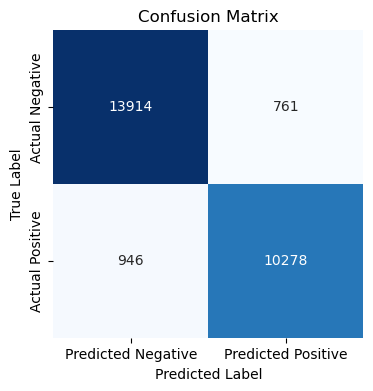

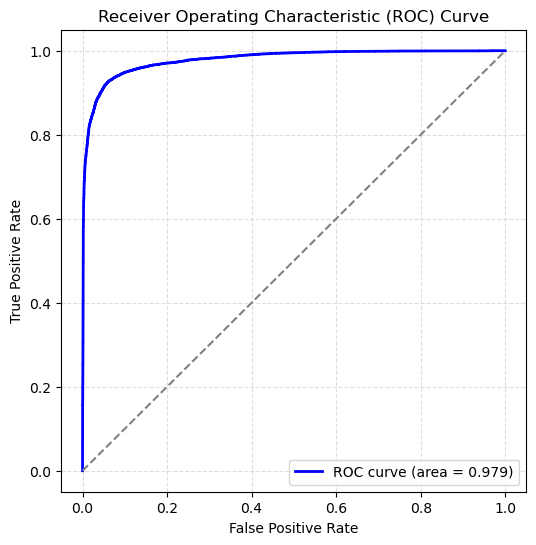

In [21]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
classModel(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[44022     0]
 [    0 33673]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00     33673

    accuracy                           1.00     77695
   macro avg       1.00      1.00      1.00     77695
weighted avg       1.00      1.00      1.00     77695

    
TEST METRICS
    Confusion Matrix: 
    [[13950   725]
 [  655 10569]]
    
    AUC: 0.9461195800918207

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.95      0.95     14675
           1       0.94      0.94      0.94     11224

    accuracy                           0.95     25899
   macro avg       0.95      0.95      0.95     25899
weighted avg       0.95      0.95      0.95     25899

    


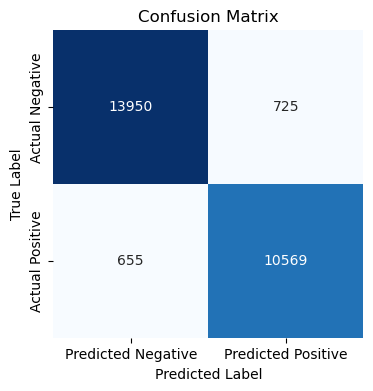

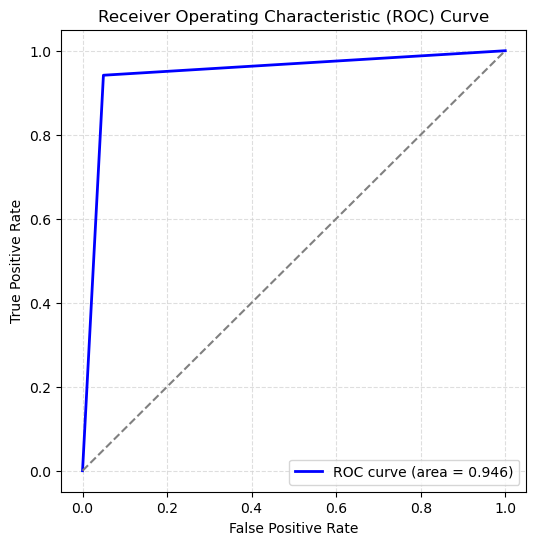

In [22]:
# Step 2: Init the Model
dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Do Machine Learning
classModel(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[44022     0]
 [    0 33673]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00     33673

    accuracy                           1.00     77695
   macro avg       1.00      1.00      1.00     77695
weighted avg       1.00      1.00      1.00     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14381   294]
 [  722 10502]]
    
    AUC: 0.9937051353815929

    Classification Report:
                  precision    recall  f1-score   support

           0       0.95      0.98      0.97     14675
           1       0.97      0.94      0.95     11224

    accuracy                           0.96     25899
   macro avg       0.96      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899

    


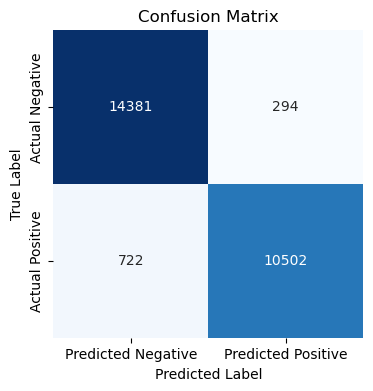

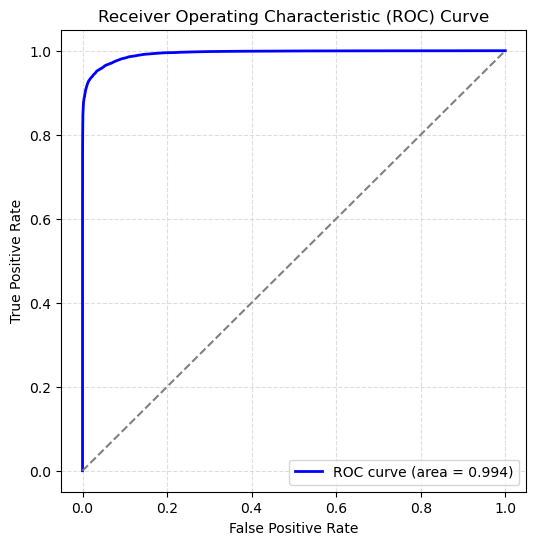

In [23]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
classModel(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[42178  1844]
 [ 2622 31051]]
    
    AUC: 0.9883971970570142

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.96      0.95     44022
           1       0.94      0.92      0.93     33673

    accuracy                           0.94     77695
   macro avg       0.94      0.94      0.94     77695
weighted avg       0.94      0.94      0.94     77695

    
TEST METRICS
    Confusion Matrix: 
    [[13976   699]
 [  952 10272]]
    
    AUC: 0.9830625903849259

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.95      0.94     14675
           1       0.94      0.92      0.93     11224

    accuracy                           0.94     25899
   macro avg       0.94      0.93      0.93     25899
weighted avg       0.94      0.94      0.94     25899

    


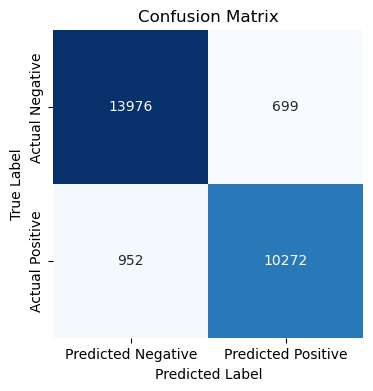

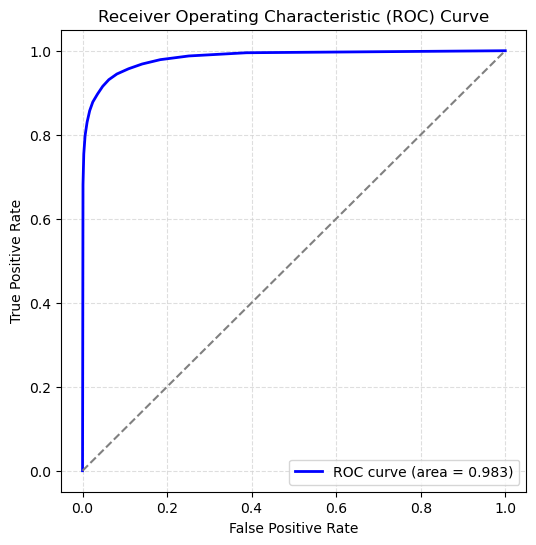

In [24]:
# Step 2: Init the Model
knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=15))
])

# Do Machine Learning
classModel(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[44022     0]
 [    0 33673]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00     33673

    accuracy                           1.00     77695
   macro avg       1.00      1.00      1.00     77695
weighted avg       1.00      1.00      1.00     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14365   310]
 [  685 10539]]
    
    AUC: 0.9932623509369676

    Classification Report:
                  precision    recall  f1-score   support

           0       0.95      0.98      0.97     14675
           1       0.97      0.94      0.95     11224

    accuracy                           0.96     25899
   macro avg       0.96      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899

    


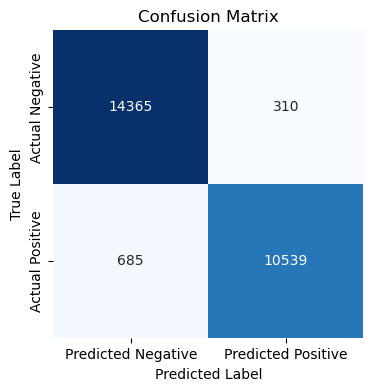

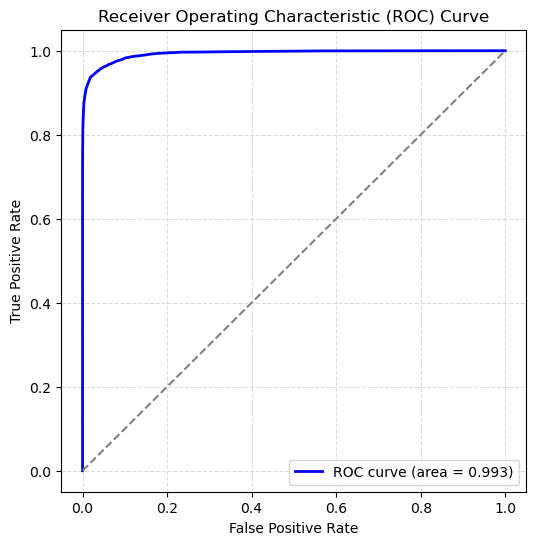

In [25]:
# Step 2: Init the Model
et = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

# Do Machine Learning
classModel(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[41442  2580]
 [ 3051 30622]]
    
    AUC: 0.9778363876217468

    Classification Report:
                  precision    recall  f1-score   support

           0       0.93      0.94      0.94     44022
           1       0.92      0.91      0.92     33673

    accuracy                           0.93     77695
   macro avg       0.93      0.93      0.93     77695
weighted avg       0.93      0.93      0.93     77695

    
TEST METRICS
    Confusion Matrix: 
    [[13808   867]
 [ 1006 10218]]
    
    AUC: 0.9776261989093704

    Classification Report:
                  precision    recall  f1-score   support

           0       0.93      0.94      0.94     14675
           1       0.92      0.91      0.92     11224

    accuracy                           0.93     25899
   macro avg       0.93      0.93      0.93     25899
weighted avg       0.93      0.93      0.93     25899

    


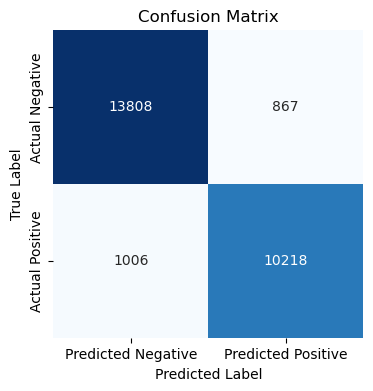

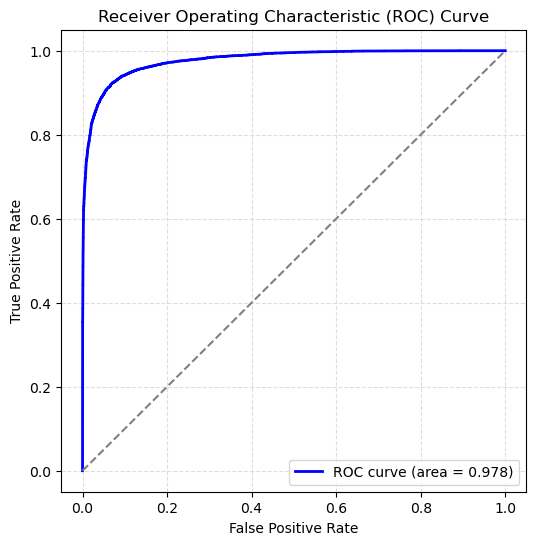

In [26]:
# Step 2: Init the Model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Do Machine Learning
classModel(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[42387  1635]
 [ 2673 31000]]
    
    AUC: 0.9881354287394927

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.96      0.95     44022
           1       0.95      0.92      0.94     33673

    accuracy                           0.94     77695
   macro avg       0.95      0.94      0.94     77695
weighted avg       0.94      0.94      0.94     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14114   561]
 [  863 10361]]
    
    AUC: 0.9882191999135461

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.96      0.95     14675
           1       0.95      0.92      0.94     11224

    accuracy                           0.95     25899
   macro avg       0.95      0.94      0.94     25899
weighted avg       0.95      0.95      0.94     25899

    


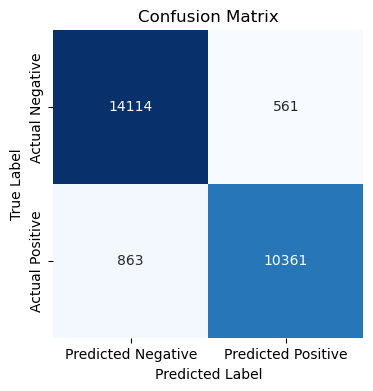

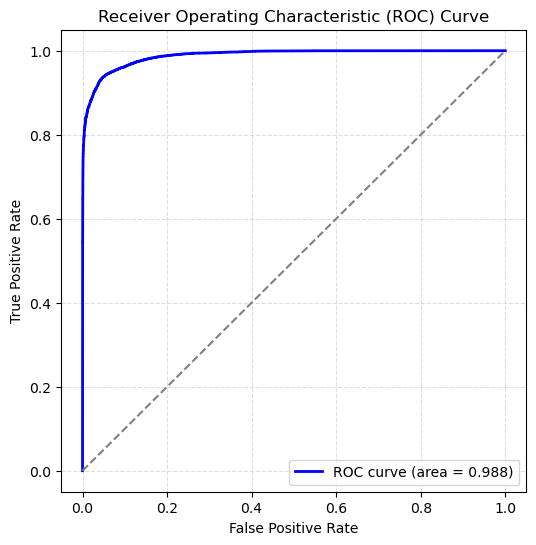

In [27]:
# Step 2: Init the Model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Do Machine Learning
classModel(gb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[43549   473]
 [ 1246 32427]]
    
    AUC: 0.9984896814098925

    Classification Report:
                  precision    recall  f1-score   support

           0       0.97      0.99      0.98     44022
           1       0.99      0.96      0.97     33673

    accuracy                           0.98     77695
   macro avg       0.98      0.98      0.98     77695
weighted avg       0.98      0.98      0.98     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14337   338]
 [  628 10596]]
    
    AUC: 0.9951723582102601

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     14675
           1       0.97      0.94      0.96     11224

    accuracy                           0.96     25899
   macro avg       0.96      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899

    


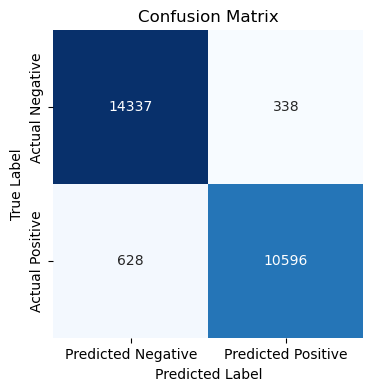

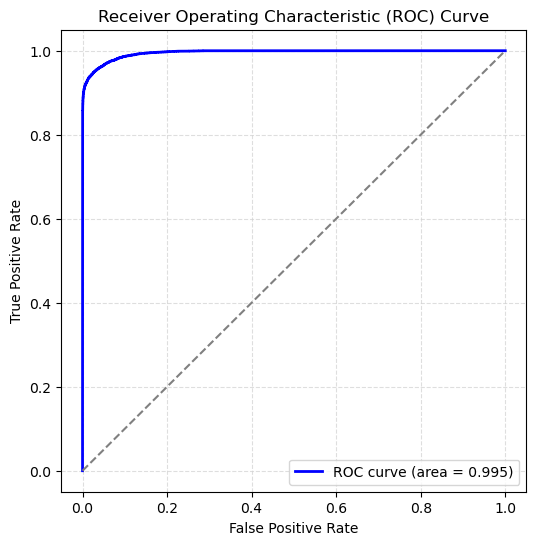

In [28]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Do Machine Learning
classModel(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[43345   677]
 [ 1903 31770]]
    
    AUC: 0.9961727822303592

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     44022
           1       0.98      0.94      0.96     33673

    accuracy                           0.97     77695
   macro avg       0.97      0.96      0.97     77695
weighted avg       0.97      0.97      0.97     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14422   253]
 [  674 10550]]
    
    AUC: 0.9949366410016988

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     14675
           1       0.98      0.94      0.96     11224

    accuracy                           0.96     25899
   macro avg       0.97      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899

    


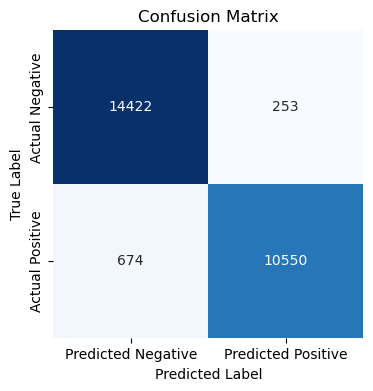

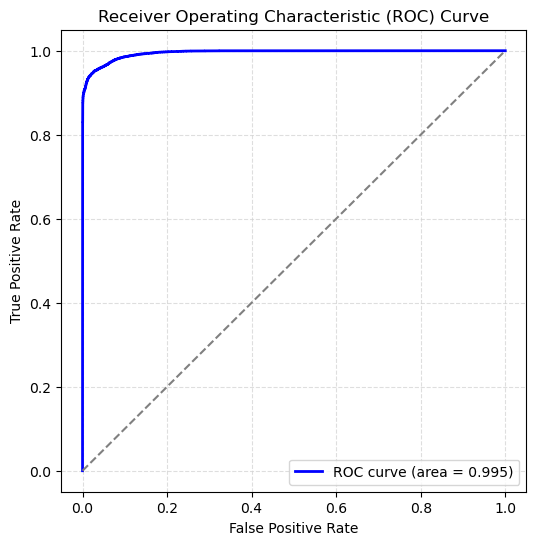

In [29]:
# Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Do Machine Learning
classModel(lgbm, X_train, X_test, y_train, y_test)

rf, et, knn, and svc took a while to run; due to time sink, unlikely to be good to productionalize

#### Feature Importance

In [30]:
fi = pd.DataFrame(list(zip(X.columns, gb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
12,seat_comfort,0.152148
6,inflight_wifi_service,0.115398
7,departure/arrival_time_convenient,0.067965
11,online_boarding,0.056960
5,flight_distance,0.056910
9,gate_location,0.003973
0,gender,0.002995
3,type_of_travel,0.002172
10,food_and_drink,0.000870
8,ease_of_online_booking,0.000803


In [31]:
fi = pd.DataFrame(list(zip(X.columns, xgb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
12,seat_comfort,0.117386
7,departure/arrival_time_convenient,0.063524
11,online_boarding,0.043181
6,inflight_wifi_service,0.026692
5,flight_distance,0.021610
9,gate_location,0.004885
8,ease_of_online_booking,0.004018
10,food_and_drink,0.003550
0,gender,0.002668
18,inflight_service,0.002201


In [32]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.named_steps['classifier'].feature_importances_ / sum(lgbm.named_steps['classifier'].feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,gender,0.086667
5,flight_distance,0.061667
6,inflight_wifi_service,0.054333
1,customer_type,0.053667
11,online_boarding,0.053000
12,seat_comfort,0.041000
7,departure/arrival_time_convenient,0.037000
3,type_of_travel,0.029333
8,ease_of_online_booking,0.016000
2,age,0.015333


Based on Feature Importances, it looks like the LightGBM Model performed the best; it weighed almost all features evenly (and didn't weigh any 1 feature more than others (as was donne with gradient boost and XGBoost))

### One-Hot Encoding w/o Ratings

In [33]:
# Drop Ratings columns
ratings = ['inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness']
df2.drop(columns=ratings, inplace=True)

In [34]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features 
numeric_features = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features 
binary_features = ['gender', 'customer_type', 'type_of_travel']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features
categorical_features = ['travel_class']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [35]:
 # Step 1: Get the data (NOTE: this is the original dataframe, not the one used for the correlations)
X = df2.drop(columns=["satisfaction"])
y = df2.satisfaction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(77695, 8) (25899, 8)


TRAIN METRICS
    Confusion Matrix: 
    [[35064  8958]
 [ 7788 25885]]
    
    AUC: 0.8433587594261283

    Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.80      0.81     44022
           1       0.74      0.77      0.76     33673

    accuracy                           0.78     77695
   macro avg       0.78      0.78      0.78     77695
weighted avg       0.79      0.78      0.78     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11708  2967]
 [ 2560  8664]]
    
    AUC: 0.8442502923280728

    Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.80      0.81     14675
           1       0.74      0.77      0.76     11224

    accuracy                           0.79     25899
   macro avg       0.78      0.78      0.78     25899
weighted avg       0.79      0.79      0.79     25899

    


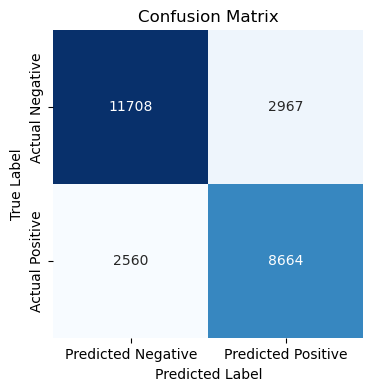

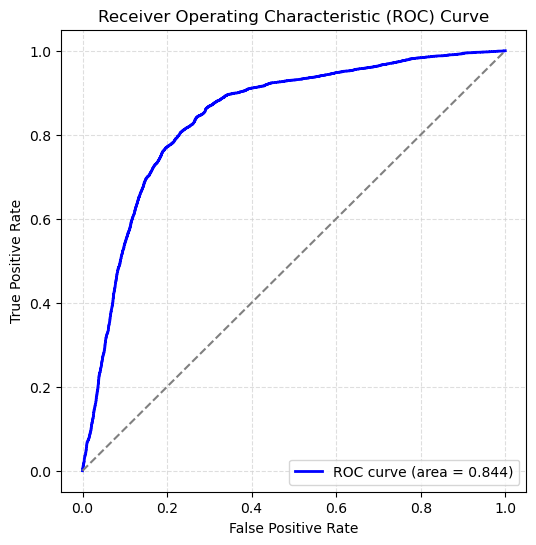

In [36]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
classModel(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[43999    23]
 [  433 33240]]
    
    AUC: 0.9999295488229406

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     44022
           1       1.00      0.99      0.99     33673

    accuracy                           0.99     77695
   macro avg       0.99      0.99      0.99     77695
weighted avg       0.99      0.99      0.99     77695

    
TEST METRICS
    Confusion Matrix: 
    [[10961  3714]
 [ 3698  7526]]
    
    AUC: 0.7108840419835325

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.75      0.75     14675
           1       0.67      0.67      0.67     11224

    accuracy                           0.71     25899
   macro avg       0.71      0.71      0.71     25899
weighted avg       0.71      0.71      0.71     25899

    


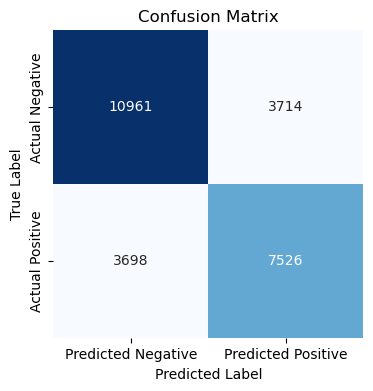

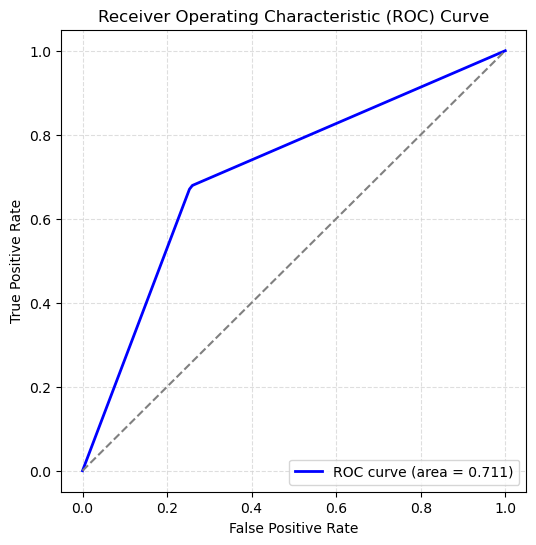

In [37]:
# Step 2: Init the Model
dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Do Machine Learning
classModel(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[43811   211]
 [  247 33426]]
    
    AUC: 0.9998326882783936

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     44022
           1       0.99      0.99      0.99     33673

    accuracy                           0.99     77695
   macro avg       0.99      0.99      0.99     77695
weighted avg       0.99      0.99      0.99     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11750  2925]
 [ 3019  8205]]
    
    AUC: 0.8365320844479036

    Classification Report:
                  precision    recall  f1-score   support

           0       0.80      0.80      0.80     14675
           1       0.74      0.73      0.73     11224

    accuracy                           0.77     25899
   macro avg       0.77      0.77      0.77     25899
weighted avg       0.77      0.77      0.77     25899

    


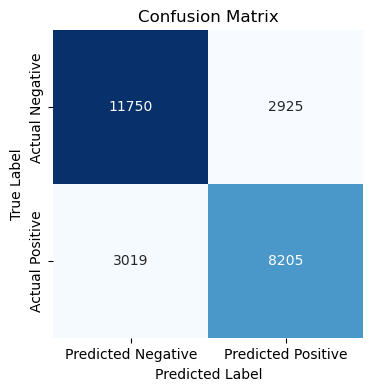

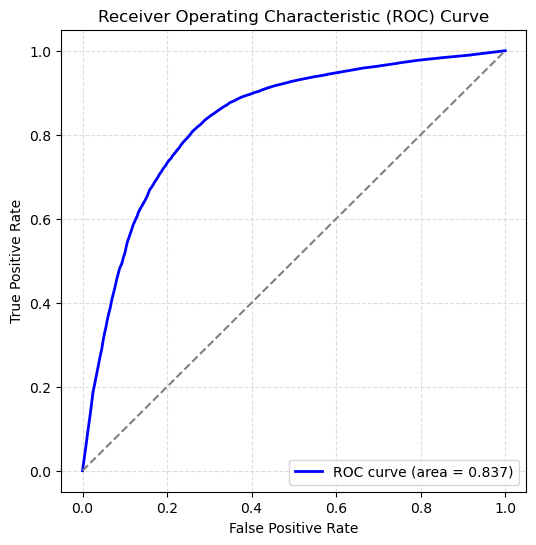

In [38]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
classModel(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[36261  7761]
 [ 6895 26778]]
    
    AUC: 0.8888519259159414

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.82      0.83     44022
           1       0.78      0.80      0.79     33673

    accuracy                           0.81     77695
   macro avg       0.81      0.81      0.81     77695
weighted avg       0.81      0.81      0.81     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11892  2783]
 [ 2478  8746]]
    
    AUC: 0.8519267425242332

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.81      0.82     14675
           1       0.76      0.78      0.77     11224

    accuracy                           0.80     25899
   macro avg       0.79      0.79      0.79     25899
weighted avg       0.80      0.80      0.80     25899

    


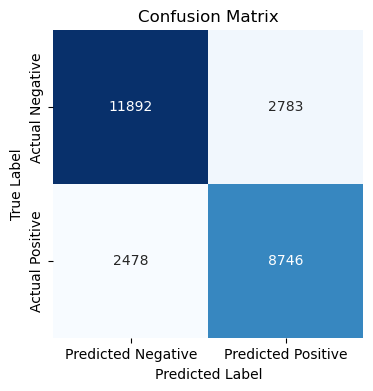

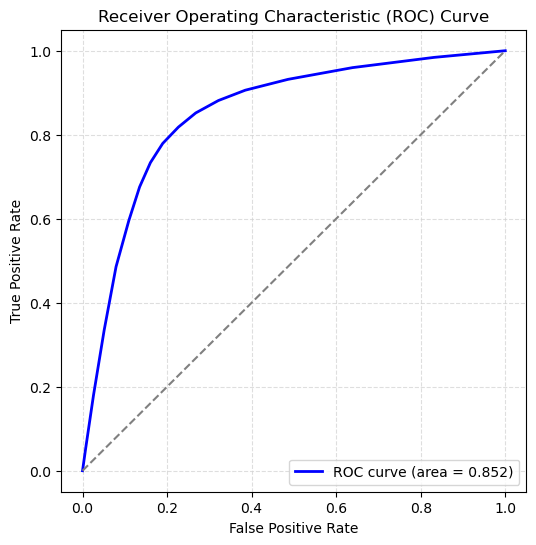

In [39]:
# Step 2: Init the Model
knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=15))
])

# Do Machine Learning
classModel(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[43999    23]
 [  433 33240]]
    
    AUC: 0.9999295488229406

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     44022
           1       1.00      0.99      0.99     33673

    accuracy                           0.99     77695
   macro avg       0.99      0.99      0.99     77695
weighted avg       0.99      0.99      0.99     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11585  3090]
 [ 3041  8183]]
    
    AUC: 0.8153617248752674

    Classification Report:
                  precision    recall  f1-score   support

           0       0.79      0.79      0.79     14675
           1       0.73      0.73      0.73     11224

    accuracy                           0.76     25899
   macro avg       0.76      0.76      0.76     25899
weighted avg       0.76      0.76      0.76     25899

    


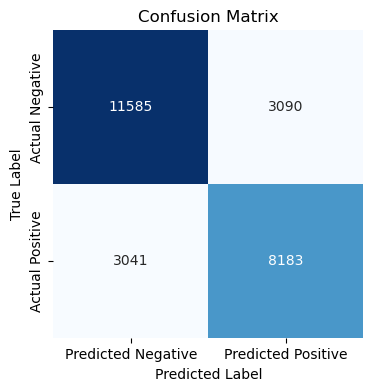

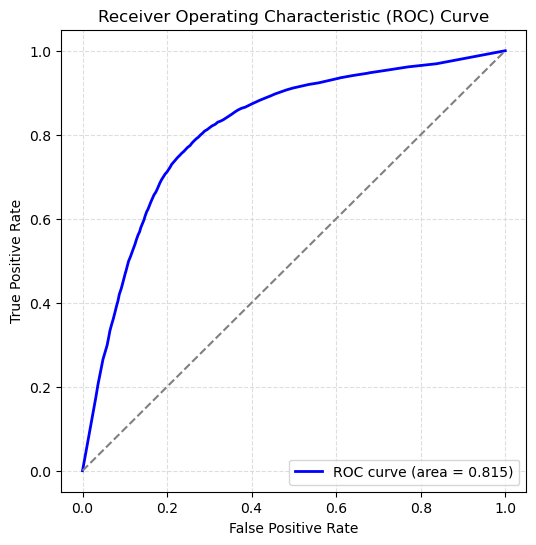

In [40]:
# Step 2: Init the Model
et = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

# Do Machine Learning
classModel(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[35495  8527]
 [ 7494 26179]]
    
    AUC: 0.8554601423947384

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.81      0.82     44022
           1       0.75      0.78      0.77     33673

    accuracy                           0.79     77695
   macro avg       0.79      0.79      0.79     77695
weighted avg       0.79      0.79      0.79     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11865  2810]
 [ 2450  8774]]
    
    AUC: 0.8563308243105245

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.81      0.82     14675
           1       0.76      0.78      0.77     11224

    accuracy                           0.80     25899
   macro avg       0.79      0.80      0.79     25899
weighted avg       0.80      0.80      0.80     25899

    


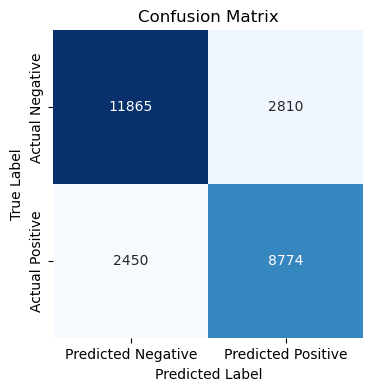

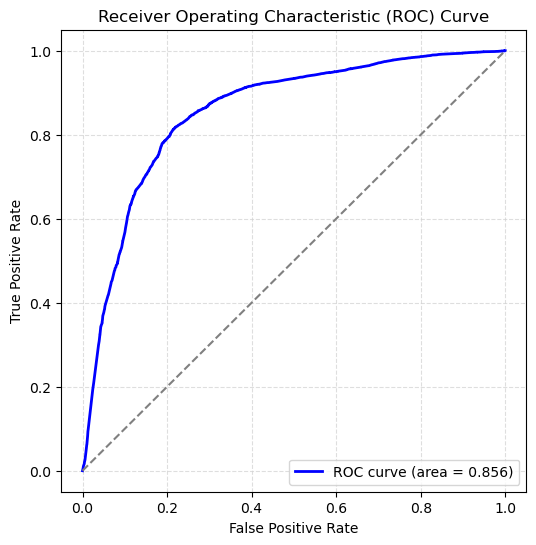

In [41]:
# Step 2: Init the Model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Do Machine Learning
classModel(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[35769  8253]
 [ 6933 26740]]
    
    AUC: 0.8692863657587329

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.81      0.82     44022
           1       0.76      0.79      0.78     33673

    accuracy                           0.80     77695
   macro avg       0.80      0.80      0.80     77695
weighted avg       0.81      0.80      0.80     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11912  2763]
 [ 2274  8950]]
    
    AUC: 0.8678358069408337

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.81      0.83     14675
           1       0.76      0.80      0.78     11224

    accuracy                           0.81     25899
   macro avg       0.80      0.80      0.80     25899
weighted avg       0.81      0.81      0.81     25899

    


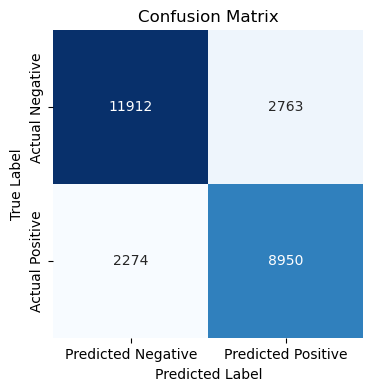

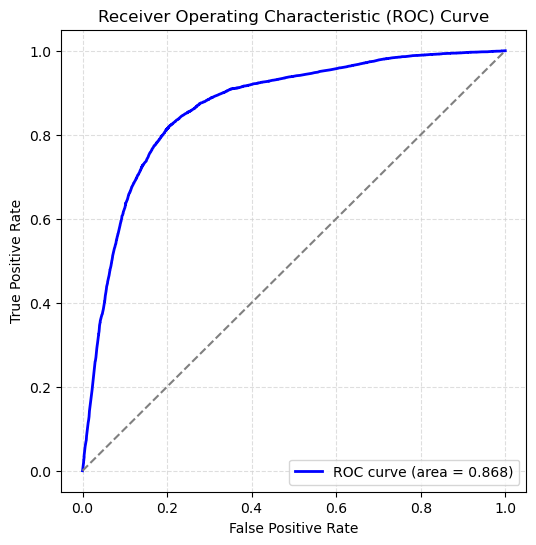

In [42]:
# Step 2: Init the Model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Do Machine Learning
classModel(gb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[36899  7123]
 [ 6536 27137]]
    
    AUC: 0.8964063441048326

    Classification Report:
                  precision    recall  f1-score   support

           0       0.85      0.84      0.84     44022
           1       0.79      0.81      0.80     33673

    accuracy                           0.82     77695
   macro avg       0.82      0.82      0.82     77695
weighted avg       0.82      0.82      0.82     77695

    
TEST METRICS
    Confusion Matrix: 
    [[12037  2638]
 [ 2410  8814]]
    
    AUC: 0.8672769776616425

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.82      0.83     14675
           1       0.77      0.79      0.78     11224

    accuracy                           0.81     25899
   macro avg       0.80      0.80      0.80     25899
weighted avg       0.81      0.81      0.81     25899

    


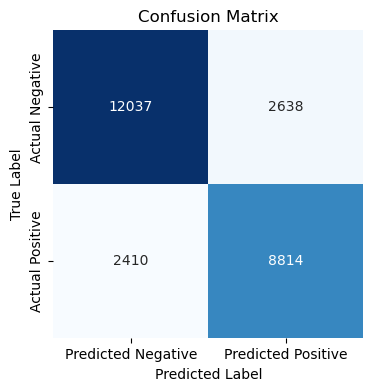

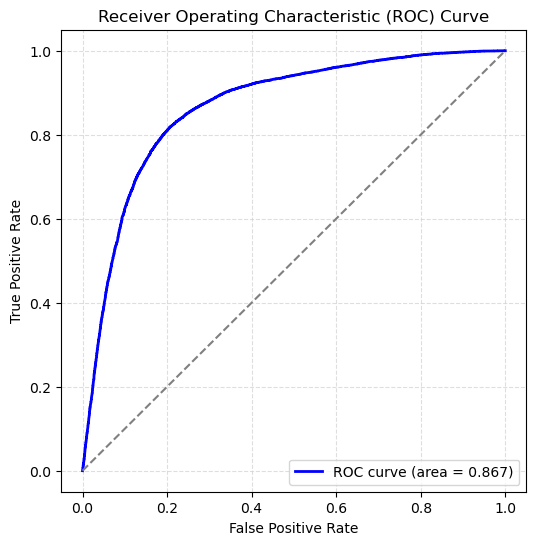

In [43]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Do Machine Learning
classModel(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[36268  7754]
 [ 6889 26784]]
    
    AUC: 0.8819666699507701

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.82      0.83     44022
           1       0.78      0.80      0.79     33673

    accuracy                           0.81     77695
   macro avg       0.81      0.81      0.81     77695
weighted avg       0.81      0.81      0.81     77695

    
TEST METRICS
    Confusion Matrix: 
    [[12035  2640]
 [ 2353  8871]]
    
    AUC: 0.8709880081742579

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.82      0.83     14675
           1       0.77      0.79      0.78     11224

    accuracy                           0.81     25899
   macro avg       0.80      0.81      0.80     25899
weighted avg       0.81      0.81      0.81     25899

    


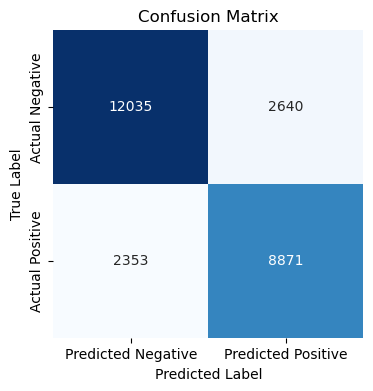

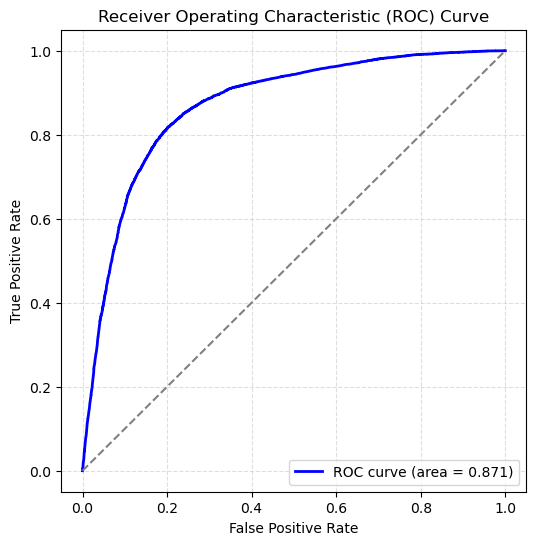

In [44]:
# Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Do Machine Learning
classModel(lgbm, X_train, X_test, y_train, y_test)

#### Feature Importance

In [45]:
fi = pd.DataFrame(list(zip(X.columns, gb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
7,arrival_delay_in_minutes,0.595967
6,departure_delay_in_minutes,0.142239
5,flight_distance,0.141164
0,gender,0.088098
3,type_of_travel,0.026678
1,customer_type,0.004953
2,age,0.000544
4,travel_class,0.000058


### Label Encoding w/ Ratings

In [46]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features 
numeric_features = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features 
binary_features = ['gender', 'customer_type', 'type_of_travel']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features
categorical_features = ['inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'travel_class']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [47]:
 # Step 1: Get the data (NOTE: this is the original dataframe, not the one used for the correlations)
X = df3.drop(columns=["satisfaction"])
y = df3.satisfaction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(77695, 22) (25899, 22)


TRAIN METRICS
    Confusion Matrix: 
    [[39844  4178]
 [ 5556 28117]]
    
    AUC: 0.9258017035115998

    Classification Report:
                  precision    recall  f1-score   support

           0       0.88      0.91      0.89     44022
           1       0.87      0.84      0.85     33673

    accuracy                           0.87     77695
   macro avg       0.87      0.87      0.87     77695
weighted avg       0.87      0.87      0.87     77695

    
TEST METRICS
    Confusion Matrix: 
    [[13313  1362]
 [ 1813  9411]]
    
    AUC: 0.9284612979487858

    Classification Report:
                  precision    recall  f1-score   support

           0       0.88      0.91      0.89     14675
           1       0.87      0.84      0.86     11224

    accuracy                           0.88     25899
   macro avg       0.88      0.87      0.87     25899
weighted avg       0.88      0.88      0.88     25899

    


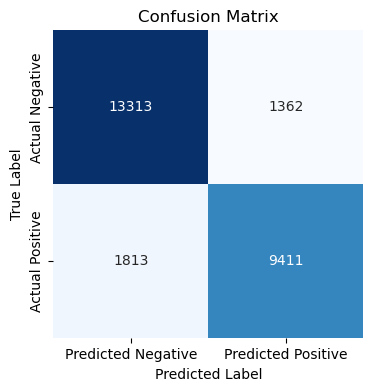

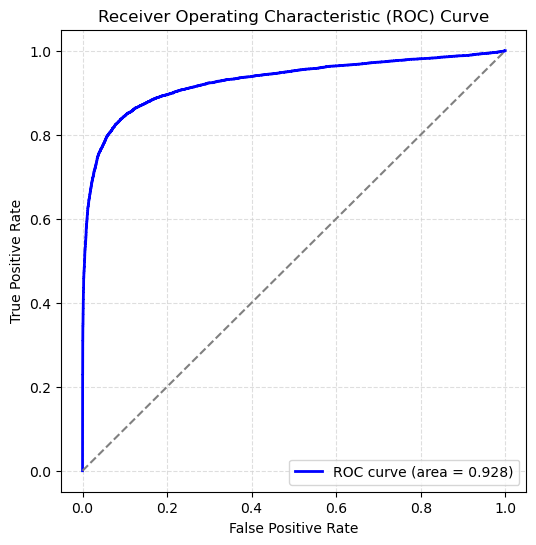

In [48]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
classModel(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[44022     0]
 [    0 33673]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00     33673

    accuracy                           1.00     77695
   macro avg       1.00      1.00      1.00     77695
weighted avg       1.00      1.00      1.00     77695

    
TEST METRICS
    Confusion Matrix: 
    [[13938   737]
 [  693 10531]]
    
    AUC: 0.9440179203483409

    Classification Report:
                  precision    recall  f1-score   support

           0       0.95      0.95      0.95     14675
           1       0.93      0.94      0.94     11224

    accuracy                           0.94     25899
   macro avg       0.94      0.94      0.94     25899
weighted avg       0.94      0.94      0.94     25899

    


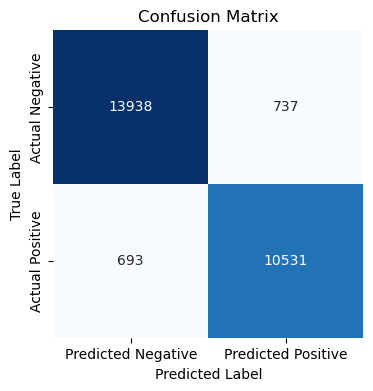

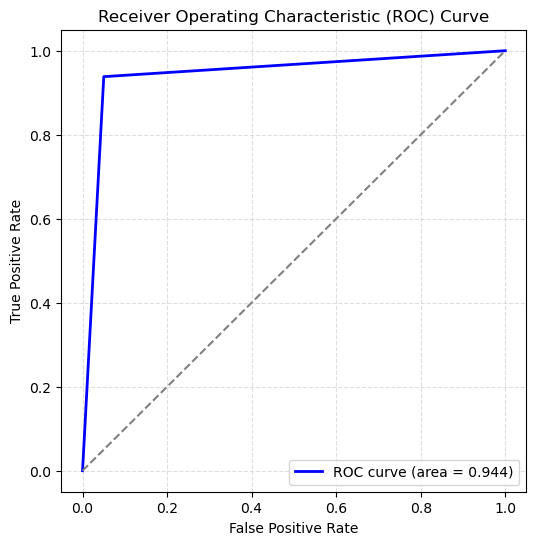

In [49]:
# Step 2: Init the Model
dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Do Machine Learning
classModel(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[44022     0]
 [    1 33672]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00     33673

    accuracy                           1.00     77695
   macro avg       1.00      1.00      1.00     77695
weighted avg       1.00      1.00      1.00     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14396   279]
 [  678 10546]]
    
    AUC: 0.993896031987916

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     14675
           1       0.97      0.94      0.96     11224

    accuracy                           0.96     25899
   macro avg       0.96      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899

    


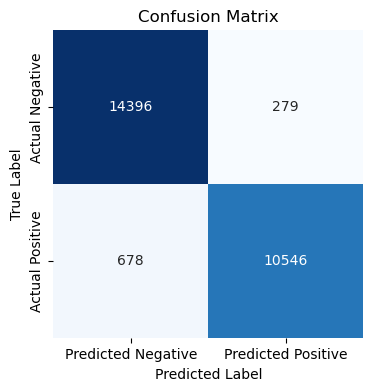

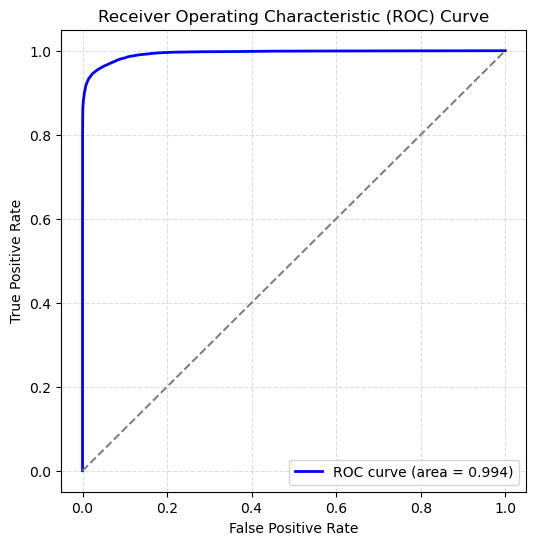

In [50]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
classModel(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[42521  1501]
 [ 3609 30064]]
    
    AUC: 0.9865410016298106

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.97      0.94     44022
           1       0.95      0.89      0.92     33673

    accuracy                           0.93     77695
   macro avg       0.94      0.93      0.93     77695
weighted avg       0.94      0.93      0.93     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14117   558]
 [ 1284  9940]]
    
    AUC: 0.979505498074824

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.96      0.94     14675
           1       0.95      0.89      0.92     11224

    accuracy                           0.93     25899
   macro avg       0.93      0.92      0.93     25899
weighted avg       0.93      0.93      0.93     25899

    


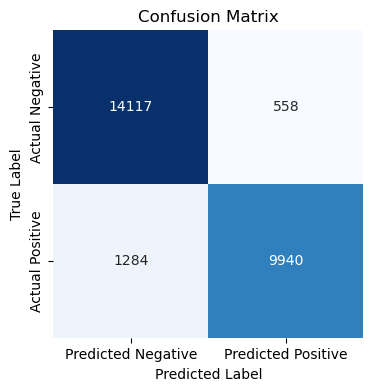

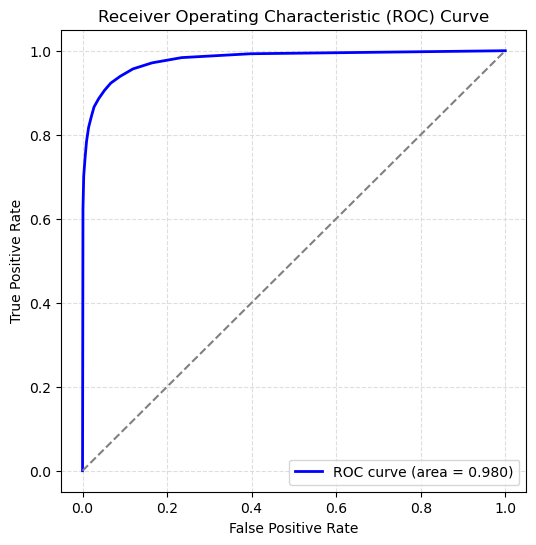

In [51]:
# Step 2: Init the Model
knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=15))
])

# Do Machine Learning
classModel(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[44022     0]
 [    0 33673]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00     33673

    accuracy                           1.00     77695
   macro avg       1.00      1.00      1.00     77695
weighted avg       1.00      1.00      1.00     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14382   293]
 [  680 10544]]
    
    AUC: 0.9933855415688699

    Classification Report:
                  precision    recall  f1-score   support

           0       0.95      0.98      0.97     14675
           1       0.97      0.94      0.96     11224

    accuracy                           0.96     25899
   macro avg       0.96      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899

    


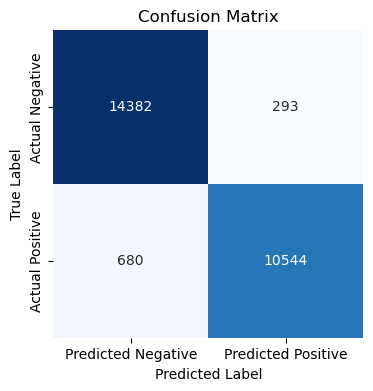

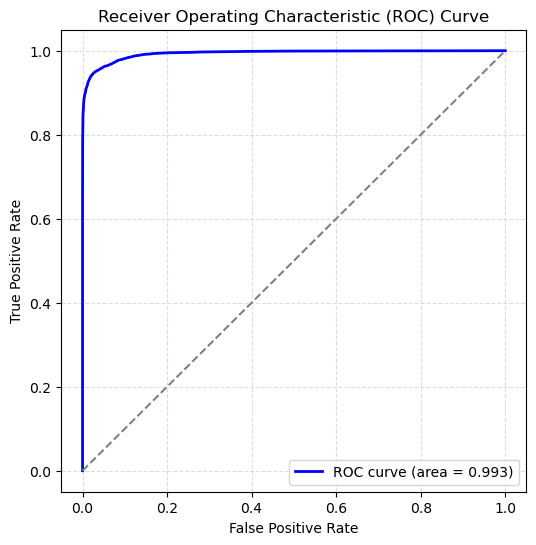

In [52]:
# Step 2: Init the Model
et = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

# Do Machine Learning
classModel(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[41444  2578]
 [ 3095 30578]]
    
    AUC: 0.9781330936408671

    Classification Report:
                  precision    recall  f1-score   support

           0       0.93      0.94      0.94     44022
           1       0.92      0.91      0.92     33673

    accuracy                           0.93     77695
   macro avg       0.93      0.92      0.93     77695
weighted avg       0.93      0.93      0.93     77695

    
TEST METRICS
    Confusion Matrix: 
    [[13781   894]
 [ 1007 10217]]
    
    AUC: 0.9776021660812011

    Classification Report:
                  precision    recall  f1-score   support

           0       0.93      0.94      0.94     14675
           1       0.92      0.91      0.91     11224

    accuracy                           0.93     25899
   macro avg       0.93      0.92      0.93     25899
weighted avg       0.93      0.93      0.93     25899

    


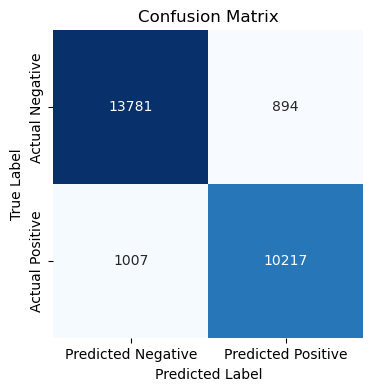

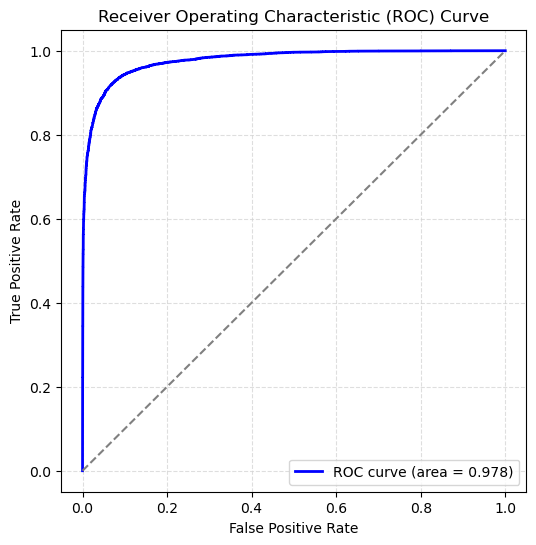

In [53]:
# Step 2: Init the Model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Do Machine Learning
classModel(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[42218  1804]
 [ 2710 30963]]
    
    AUC: 0.9874839957634216

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.96      0.95     44022
           1       0.94      0.92      0.93     33673

    accuracy                           0.94     77695
   macro avg       0.94      0.94      0.94     77695
weighted avg       0.94      0.94      0.94     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14052   623]
 [  881 10343]]
    
    AUC: 0.9874051132824405

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.96      0.95     14675
           1       0.94      0.92      0.93     11224

    accuracy                           0.94     25899
   macro avg       0.94      0.94      0.94     25899
weighted avg       0.94      0.94      0.94     25899

    


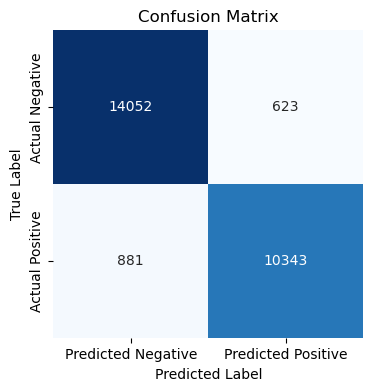

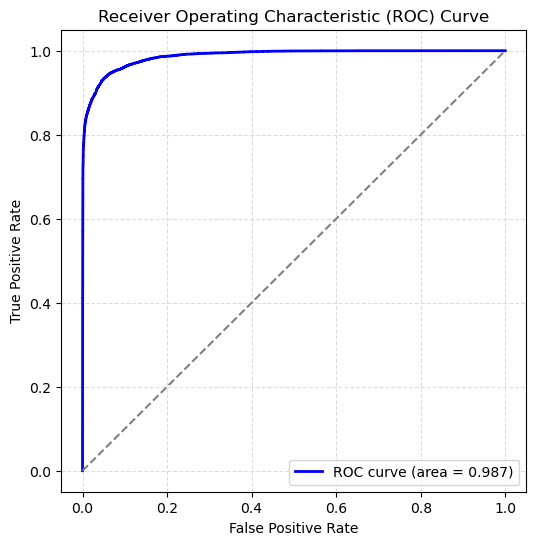

In [54]:
# Step 2: Init the Model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Do Machine Learning
classModel(gb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[43515   507]
 [ 1309 32364]]
    
    AUC: 0.9982003862446225

    Classification Report:
                  precision    recall  f1-score   support

           0       0.97      0.99      0.98     44022
           1       0.98      0.96      0.97     33673

    accuracy                           0.98     77695
   macro avg       0.98      0.97      0.98     77695
weighted avg       0.98      0.98      0.98     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14386   289]
 [  635 10589]]
    
    AUC: 0.9950054701473235

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     14675
           1       0.97      0.94      0.96     11224

    accuracy                           0.96     25899
   macro avg       0.97      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899

    


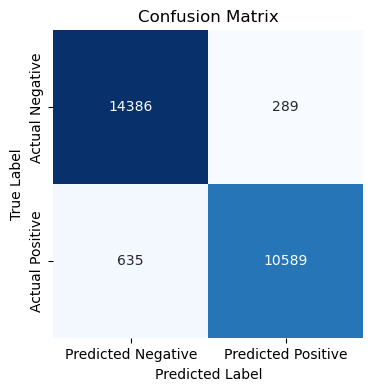

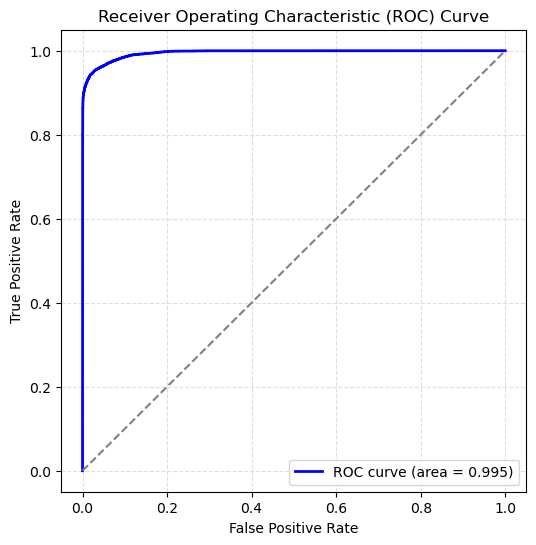

In [55]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Do Machine Learning
classModel(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[43323   699]
 [ 1907 31766]]
    
    AUC: 0.9961959612602509

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     44022
           1       0.98      0.94      0.96     33673

    accuracy                           0.97     77695
   macro avg       0.97      0.96      0.97     77695
weighted avg       0.97      0.97      0.97     77695

    
TEST METRICS
    Confusion Matrix: 
    [[14419   256]
 [  669 10555]]
    
    AUC: 0.9950056279984119

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     14675
           1       0.98      0.94      0.96     11224

    accuracy                           0.96     25899
   macro avg       0.97      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899

    


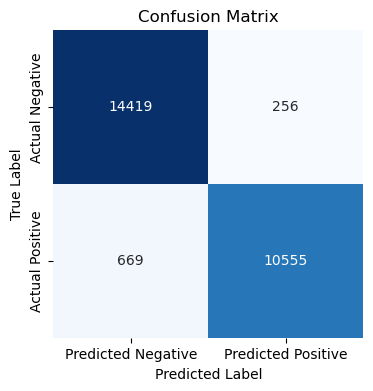

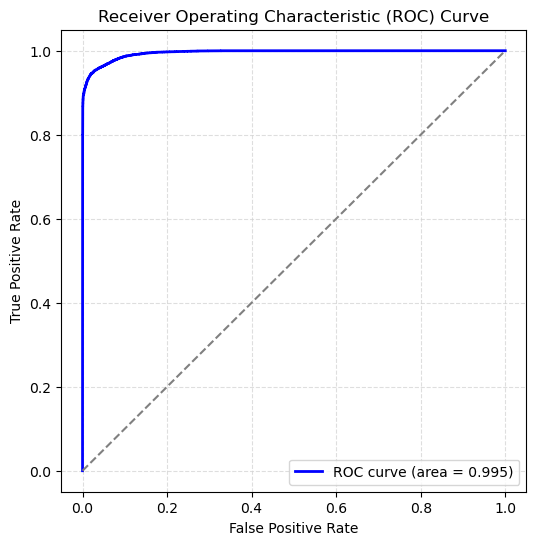

In [56]:
# Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Do Machine Learning
classModel(lgbm, X_train, X_test, y_train, y_test)

#### Feature Importance

In [57]:
fi = pd.DataFrame(list(zip(X.columns, gb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
12,seat_comfort,0.345966
7,departure/arrival_time_convenient,0.241985
6,inflight_wifi_service,0.150209
21,arrival_delay_in_minutes,0.110765
14,on-board_service,0.045672
5,flight_distance,0.029179
16,baggage_handling,0.020327
18,inflight_service,0.016273
15,leg_room_service,0.010092
13,inflight_entertainment,0.008338


### Label Encoding w/o Ratings

In [58]:
# Drop Ratings columns
ratings = ['inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness']
df4.drop(columns=ratings, inplace=True)

In [59]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features 
numeric_features = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features 
binary_features = ['gender', 'customer_type', 'type_of_travel']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features
categorical_features = ['travel_class']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [60]:
 # Step 1: Get the data (NOTE: this is the original dataframe, not the one used for the correlations)
X = df4.drop(columns=["satisfaction"])
y = df4.satisfaction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(77695, 8) (25899, 8)


TRAIN METRICS
    Confusion Matrix: 
    [[33986 10036]
 [ 7163 26510]]
    
    AUC: 0.8416827495113873

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.77      0.80     44022
           1       0.73      0.79      0.76     33673

    accuracy                           0.78     77695
   macro avg       0.78      0.78      0.78     77695
weighted avg       0.78      0.78      0.78     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11324  3351]
 [ 2359  8865]]
    
    AUC: 0.8434084360478459

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.77      0.80     14675
           1       0.73      0.79      0.76     11224

    accuracy                           0.78     25899
   macro avg       0.78      0.78      0.78     25899
weighted avg       0.78      0.78      0.78     25899

    


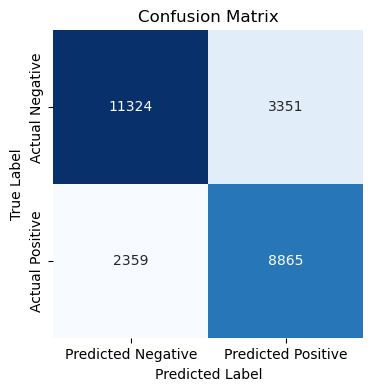

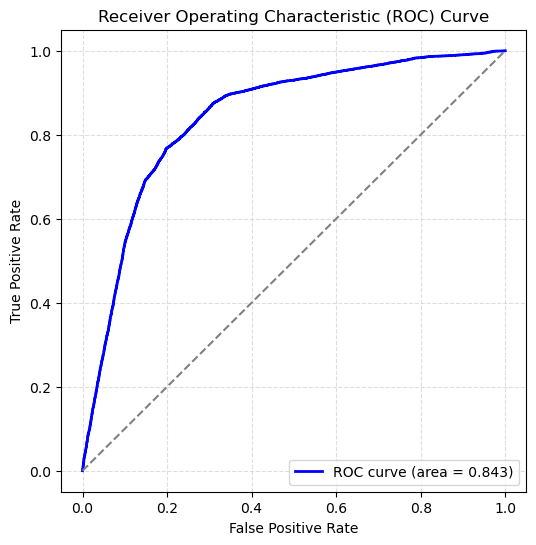

In [61]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
classModel(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[43999    23]
 [  433 33240]]
    
    AUC: 0.9999295488229406

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     44022
           1       1.00      0.99      0.99     33673

    accuracy                           0.99     77695
   macro avg       0.99      0.99      0.99     77695
weighted avg       0.99      0.99      0.99     77695

    
TEST METRICS
    Confusion Matrix: 
    [[10976  3699]
 [ 3728  7496]]
    
    AUC: 0.7098112525969541

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.75      0.75     14675
           1       0.67      0.67      0.67     11224

    accuracy                           0.71     25899
   macro avg       0.71      0.71      0.71     25899
weighted avg       0.71      0.71      0.71     25899

    


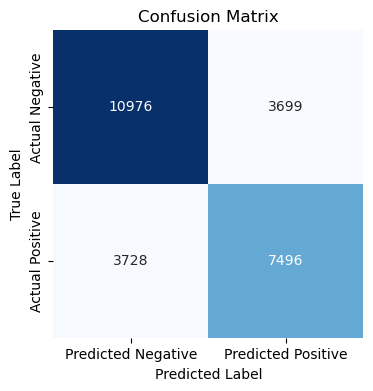

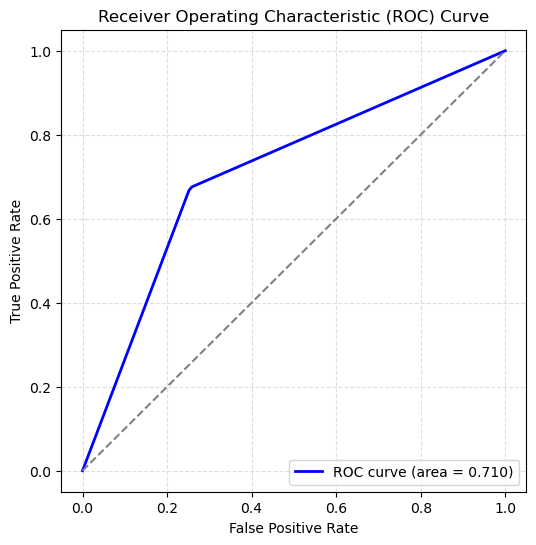

In [62]:
# Step 2: Init the Model
dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Do Machine Learning
classModel(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[43807   215]
 [  246 33427]]
    
    AUC: 0.9998332896871787

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     44022
           1       0.99      0.99      0.99     33673

    accuracy                           0.99     77695
   macro avg       0.99      0.99      0.99     77695
weighted avg       0.99      0.99      0.99     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11757  2918]
 [ 2976  8248]]
    
    AUC: 0.8359832726416137

    Classification Report:
                  precision    recall  f1-score   support

           0       0.80      0.80      0.80     14675
           1       0.74      0.73      0.74     11224

    accuracy                           0.77     25899
   macro avg       0.77      0.77      0.77     25899
weighted avg       0.77      0.77      0.77     25899

    


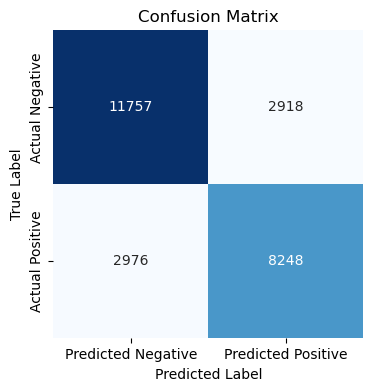

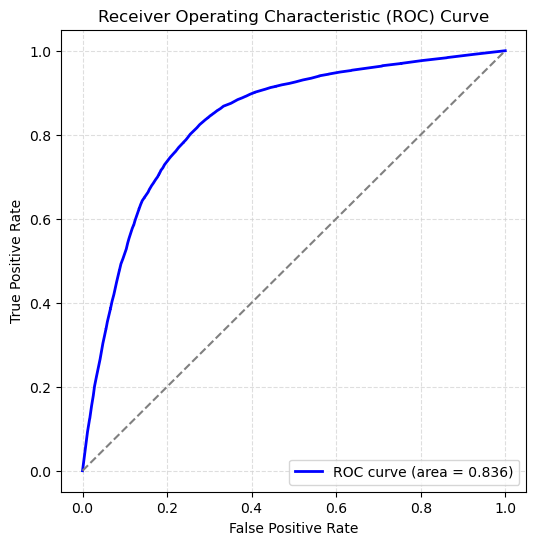

In [63]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
classModel(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[36283  7739]
 [ 6891 26782]]
    
    AUC: 0.8889679967995419

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.82      0.83     44022
           1       0.78      0.80      0.79     33673

    accuracy                           0.81     77695
   macro avg       0.81      0.81      0.81     77695
weighted avg       0.81      0.81      0.81     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11901  2774]
 [ 2475  8749]]
    
    AUC: 0.8518823499412915

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.81      0.82     14675
           1       0.76      0.78      0.77     11224

    accuracy                           0.80     25899
   macro avg       0.79      0.80      0.79     25899
weighted avg       0.80      0.80      0.80     25899

    


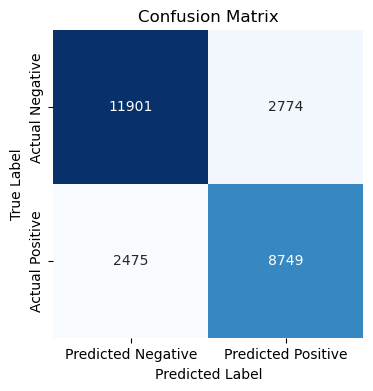

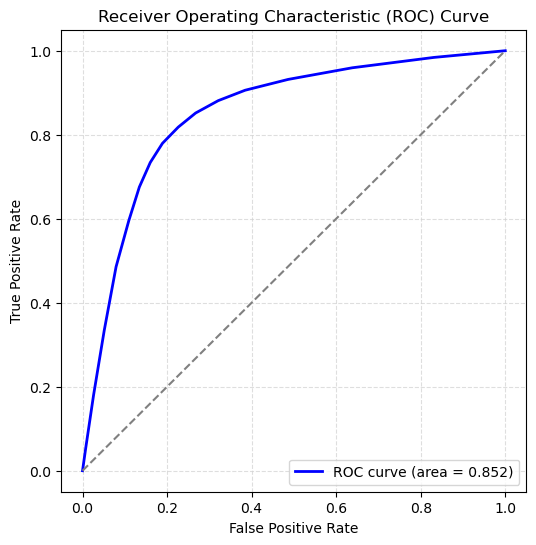

In [64]:
# Step 2: Init the Model
knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=15))
])

# Do Machine Learning
classModel(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[43999    23]
 [  433 33240]]
    
    AUC: 0.9999295488229406

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     44022
           1       1.00      0.99      0.99     33673

    accuracy                           0.99     77695
   macro avg       0.99      0.99      0.99     77695
weighted avg       0.99      0.99      0.99     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11582  3093]
 [ 3019  8205]]
    
    AUC: 0.8169033107444379

    Classification Report:
                  precision    recall  f1-score   support

           0       0.79      0.79      0.79     14675
           1       0.73      0.73      0.73     11224

    accuracy                           0.76     25899
   macro avg       0.76      0.76      0.76     25899
weighted avg       0.76      0.76      0.76     25899

    


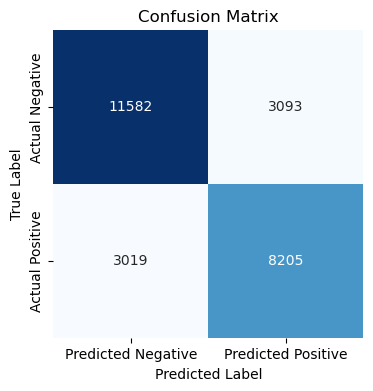

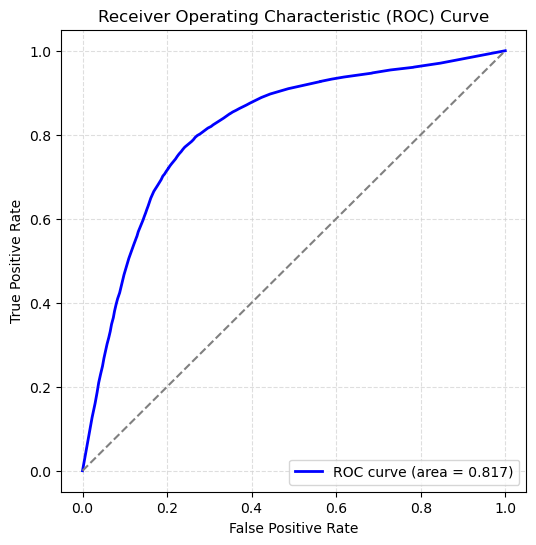

In [65]:
# Step 2: Init the Model
et = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

# Do Machine Learning
classModel(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[35468  8554]
 [ 7491 26182]]
    
    AUC: 0.8556103175076393

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.81      0.82     44022
           1       0.75      0.78      0.77     33673

    accuracy                           0.79     77695
   macro avg       0.79      0.79      0.79     77695
weighted avg       0.79      0.79      0.79     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11852  2823]
 [ 2459  8765]]
    
    AUC: 0.8562778713416492

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.81      0.82     14675
           1       0.76      0.78      0.77     11224

    accuracy                           0.80     25899
   macro avg       0.79      0.79      0.79     25899
weighted avg       0.80      0.80      0.80     25899

    


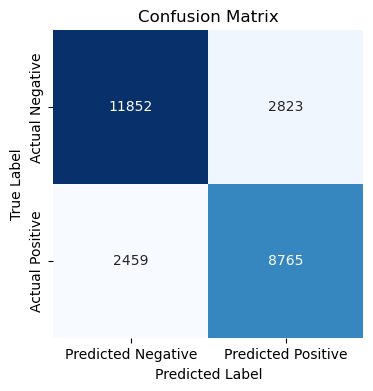

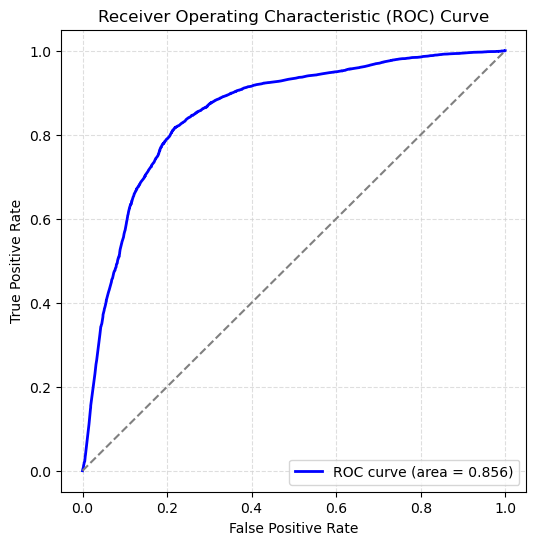

In [66]:
# Step 2: Init the Model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Do Machine Learning
classModel(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[35688  8334]
 [ 6883 26790]]
    
    AUC: 0.8692092947001175

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.81      0.82     44022
           1       0.76      0.80      0.78     33673

    accuracy                           0.80     77695
   macro avg       0.80      0.80      0.80     77695
weighted avg       0.81      0.80      0.80     77695

    
TEST METRICS
    Confusion Matrix: 
    [[11885  2790]
 [ 2252  8972]]
    
    AUC: 0.8679032731030245

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.81      0.83     14675
           1       0.76      0.80      0.78     11224

    accuracy                           0.81     25899
   macro avg       0.80      0.80      0.80     25899
weighted avg       0.81      0.81      0.81     25899

    


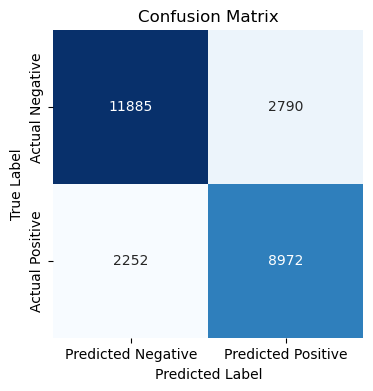

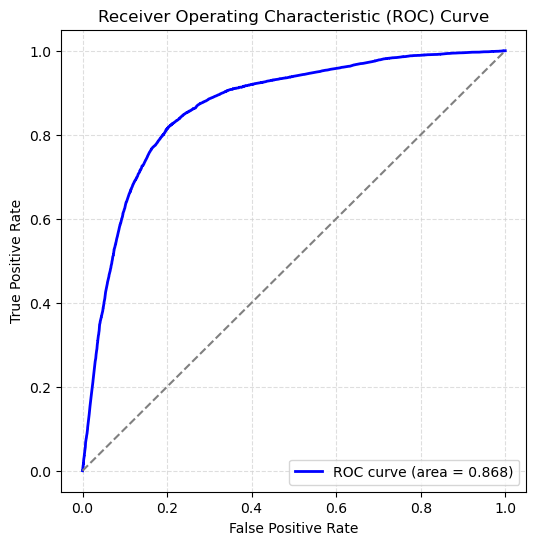

In [67]:
# Step 2: Init the Model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Do Machine Learning
classModel(gb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[36949  7073]
 [ 6563 27110]]
    
    AUC: 0.8958128389713453

    Classification Report:
                  precision    recall  f1-score   support

           0       0.85      0.84      0.84     44022
           1       0.79      0.81      0.80     33673

    accuracy                           0.82     77695
   macro avg       0.82      0.82      0.82     77695
weighted avg       0.82      0.82      0.82     77695

    
TEST METRICS
    Confusion Matrix: 
    [[12060  2615]
 [ 2420  8804]]
    
    AUC: 0.8674728738976226

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.82      0.83     14675
           1       0.77      0.78      0.78     11224

    accuracy                           0.81     25899
   macro avg       0.80      0.80      0.80     25899
weighted avg       0.81      0.81      0.81     25899

    


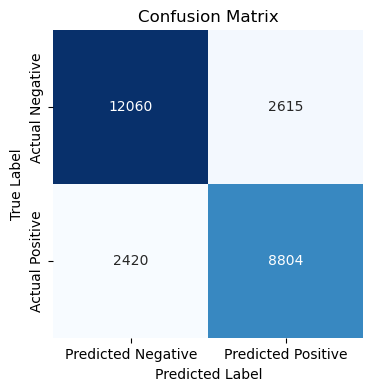

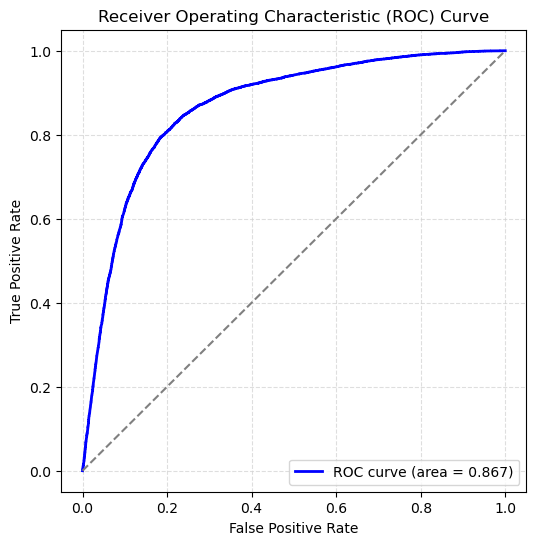

In [68]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Do Machine Learning
classModel(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[36278  7744]
 [ 6901 26772]]
    
    AUC: 0.8818125167025859

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.82      0.83     44022
           1       0.78      0.80      0.79     33673

    accuracy                           0.81     77695
   macro avg       0.81      0.81      0.81     77695
weighted avg       0.81      0.81      0.81     77695

    
TEST METRICS
    Confusion Matrix: 
    [[12053  2622]
 [ 2351  8873]]
    
    AUC: 0.8709317069409551

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.82      0.83     14675
           1       0.77      0.79      0.78     11224

    accuracy                           0.81     25899
   macro avg       0.80      0.81      0.81     25899
weighted avg       0.81      0.81      0.81     25899

    


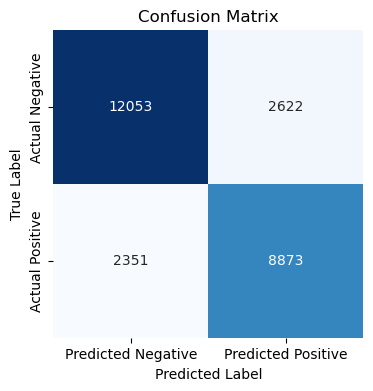

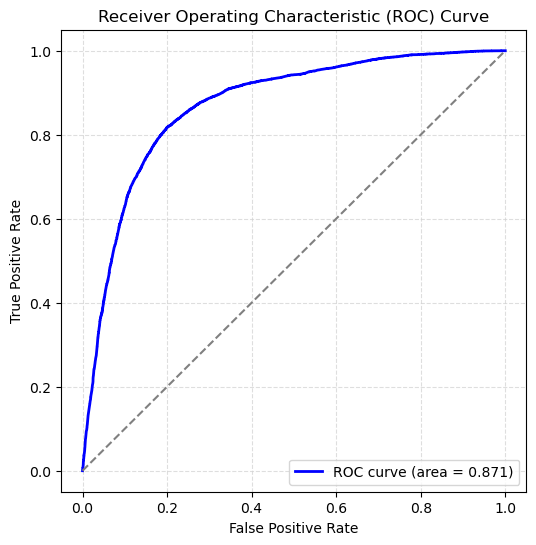

In [69]:
# Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Do Machine Learning
classModel(lgbm, X_train, X_test, y_train, y_test)

#### Feature Importance

In [70]:
fi = pd.DataFrame(list(zip(X.columns, gb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
7,arrival_delay_in_minutes,0.595878
6,departure_delay_in_minutes,0.142022
5,flight_distance,0.140963
0,gender,0.088911
3,type_of_travel,0.026618
1,customer_type,0.004954
2,age,0.000593
4,travel_class,0.000060


### Analysis